LOAD RAW DATA

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/hospital_admissions_dirty.csv")
df.head()

,Admission_ID,Patient_ID,Admission_Date,Discharge_Date,Age,Gender,Department,Diagnosis_Code,Blood_Pressure_Raw,Billing_Amount,Insurance_Provider,Room_Number,Attending_Doctor
0,5000,P-86172,2024-07-18,2024-07-27,100,F,Cardiology,M54.5,154/73,"$3,366.76",Medicare,349.0,Dr. Patel
1,5001,P-53127,2025-03-24,2025-03-26,62,Female,Cardiology,I10,158/83,10233.04,NaN,223.0,Dr. Wu
2,5002,P-65351,2024-08-01,2024-08-03,68,M,Neurology,A01.0,173/99,16734.38,Private Pay,540.0,Dr. Jones
3,5003,P-61726,2025-01-23,2025-01-27,60,F,Oncology,M54.5,143/60,44893.43,Aetna,374.0,Dr. Smith
4,5004,P-55287,2024-01-23,2024-01-29,135,Male,Orthopedics,S82.0,109/62,28602.92,Medicare,134.0,Dr. Patel


DATASET OVERVIEW

In [23]:
df.shape

(1125, 13)

DATA TYPE ANALYSIS

In [27]:
df.dtypes

Admission_ID            int64
Patient_ID             object
Admission_Date         object
Discharge_Date         object
Age                     int64
Gender                 object
Department             object
Diagnosis_Code         object
Blood_Pressure_Raw     object
Billing_Amount         object
Insurance_Provider     object
Room_Number           float64
Attending_Doctor       object
dtype: object

DATASET STRUCTURE 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Admission_ID        1125 non-null   int64  
 1   Patient_ID          1125 non-null   object 
 2   Admission_Date      1125 non-null   object 
 3   Discharge_Date      1125 non-null   object 
 4   Age                 1125 non-null   int64  
 5   Gender              1125 non-null   object 
 6   Department          1125 non-null   object 
 7   Diagnosis_Code      1125 non-null   object 
 8   Blood_Pressure_Raw  1125 non-null   object 
 9   Billing_Amount      1125 non-null   object 
 10  Insurance_Provider  955 non-null    object 
 11  Room_Number         1067 non-null   float64
 12  Attending_Doctor    1125 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 114.4+ KB


STATISTICAL SUMMARY OF NUMERICAL FEATURE

In [25]:
df.describe()

,Admission_ID,Age,Room_Number
count,1125.000000,1125.000000,1067.000000
mean,5551.352000,50.605333,350.477038
std,317.517229,21.052442,144.212060
min,5000.000000,-5.000000,101.000000
25%,5278.000000,36.000000,224.000000
50%,5552.000000,50.000000,352.000000
75%,5826.000000,65.000000,473.000000
max,6099.000000,135.000000,599.000000


MISSING VALUES

In [30]:
df.isnull().sum()

Admission_ID            0
Patient_ID              0
Admission_Date          0
Discharge_Date          0
Age                     0
Gender                  0
Department              0
Diagnosis_Code          0
Blood_Pressure_Raw      0
Billing_Amount          0
Insurance_Provider    170
Room_Number            58
Attending_Doctor        0
dtype: int64

VISUALIZING MISSING DATA

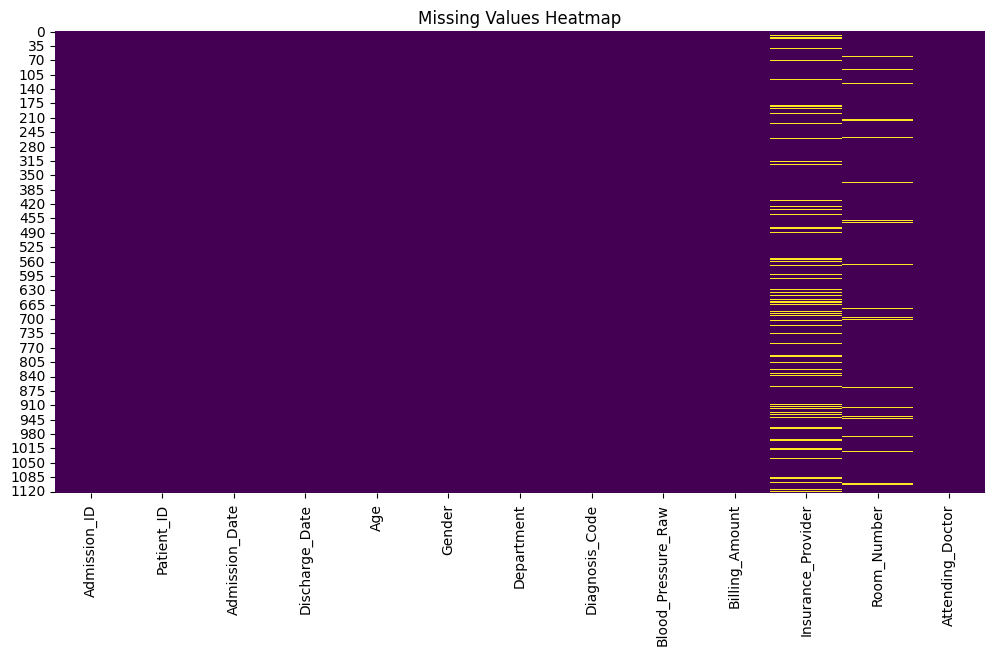

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


NUMERICAL FEATURE DISTRIBUTION

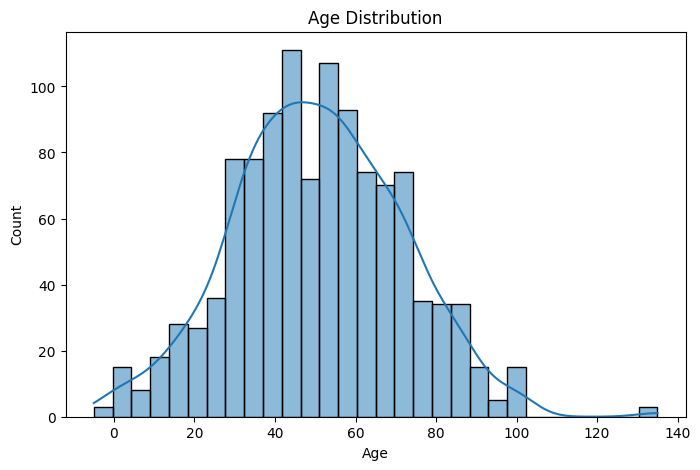

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()



BILLING AMOUNT DISTRIBUTION

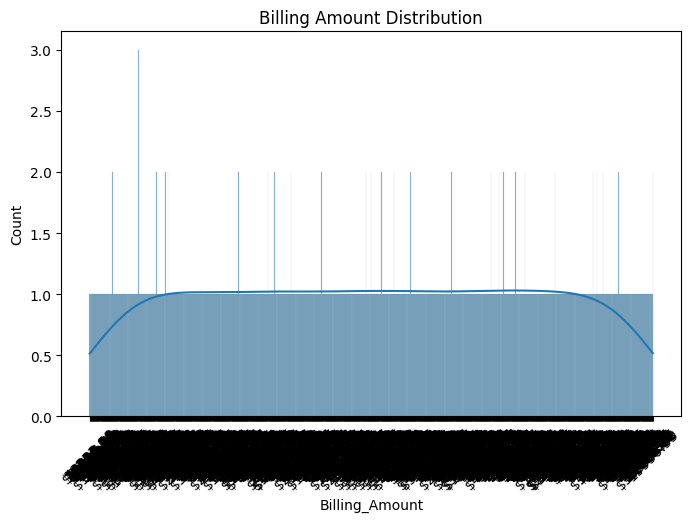

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["Billing_Amount"], bins=30, kde=True)
plt.title("Billing Amount Distribution")
plt.xticks(rotation=45)
plt.show()


CATEGORICAL FEATURE ANALYSIS

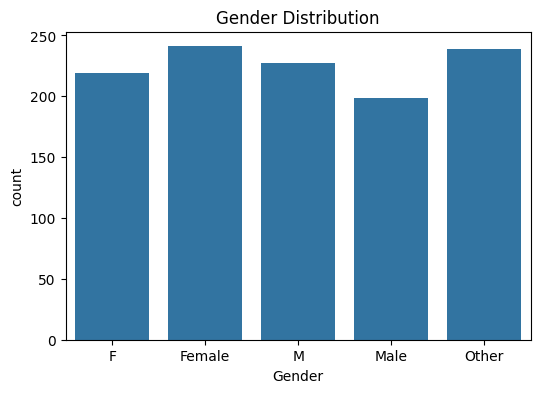

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()



CORRELATION ANALYSIS

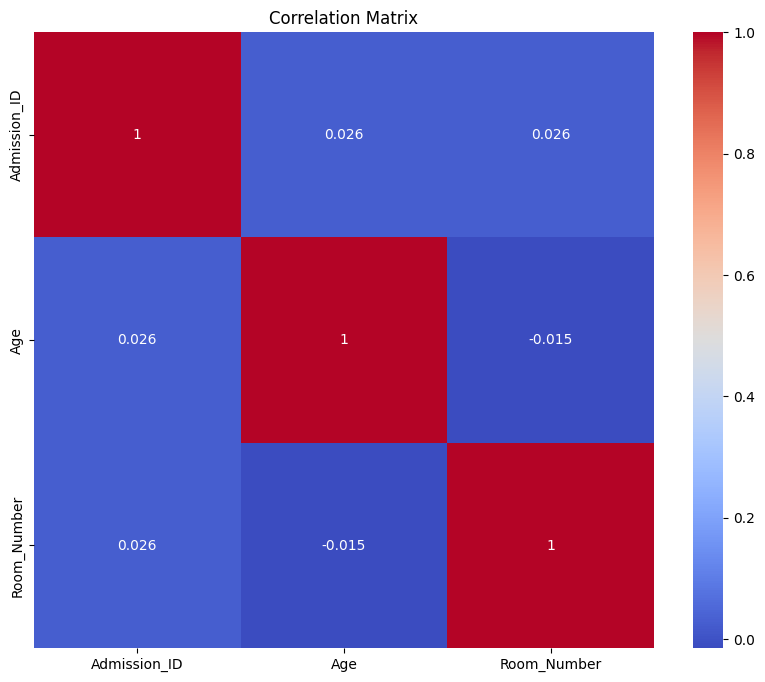

In [ ]:
import numpy as np
new_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



OUTLIER ANALYSIS

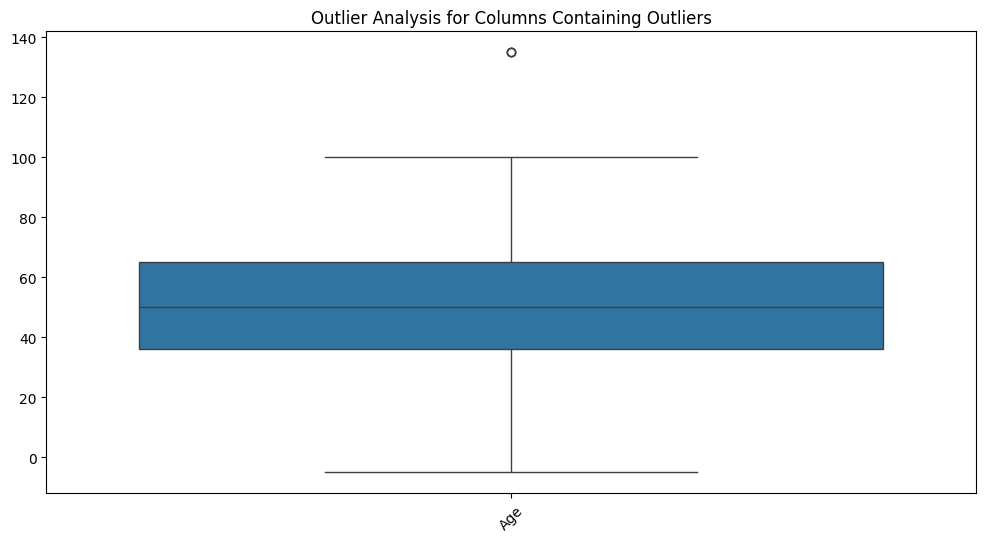

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df[outlier_columns])
plt.title("Outlier Analysis for Columns Containing Outliers")
plt.xticks(rotation=45)
plt.show()


DUPLICATE RECORD ANALYSIS

In [69]:
df.duplicated().sum()
df[df.duplicated()]



,Admission_ID,Patient_ID,Admission_Date,Discharge_Date,Age,Gender,Department,Diagnosis_Code,Blood_Pressure_Raw,Billing_Amount,Insurance_Provider,Room_Number,Attending_Doctor
1100,5849,P-59685,2025-01-29,2025-02-11,56,F,Pediatrics,I10,149/107,46533.23,Cigna,NaN,Dr. Smith
1101,5451,P-95953,2024-10-25,2024-11-02,53,Other,Cardiology,S82.0,134/91,44628.71,UnitedHealth,449.0,Dr. Wu
1102,5130,P-92947,2024-08-21,2024-08-31,53,Female,Pediatrics,M54.5,94/91,10770.57,UnitedHealth,384.0,Dr. Jones
1103,5983,P-75099,2024-02-01,2024-02-08,40,F,Orthopedics,E11.9,101/74,49266.35,Aetna,NaN,Dr. Garcia
1104,5290,P-30359,2024-05-27,2024-06-04,3,Other,Orthopedics,I10,169/104,2924.77,BlueCross,483.0,Dr. Patel
1105,6032,P-98068,2024-10-10,2024-10-18,59,M,Pediatrics,A01.0,179/74,22178.84,UnitedHealth,550.0,Dr. Smith
1106,6099,P-67297,2025-07-26,2025-08-03,84,Female,Oncology,S82.0,96/96,19950.33,Cigna,507.0,Dr. Jones
1107,5909,P-93335,2024-02-25,2024-02-29,54,F,Cardiology,J01.9,90/63,3817.15,BlueCross,154.0,Dr. Jones
1108,5147,P-46698,2024-02-25,2024-03-03,70,M,Cardiology,S82.0,151/90,8081.22,Medicare,293.0,Dr. Patel
1109,5593,P-39348,2025-08-27,2025-09-08,14,M,Cardiology,J01.9,144/66,36457.11,Aetna,134.0,Dr. Smith


DATA INCONSISTENCIES


In [63]:
df["Gender"].value_counts()


Gender
Female    241
Other     239
M         227
F         219
Male      199
Name: count, dtype: int64

In [64]:
df["Department"].value_counts().head(10)

Department
Pediatrics         204
General Surgery    183
Oncology           182
Orthopedics        178
Neurology          172
Cardiology         161
neuro               24
Cardiologgy         21
Name: count, dtype: int64

TARGET DISTRIBUTION

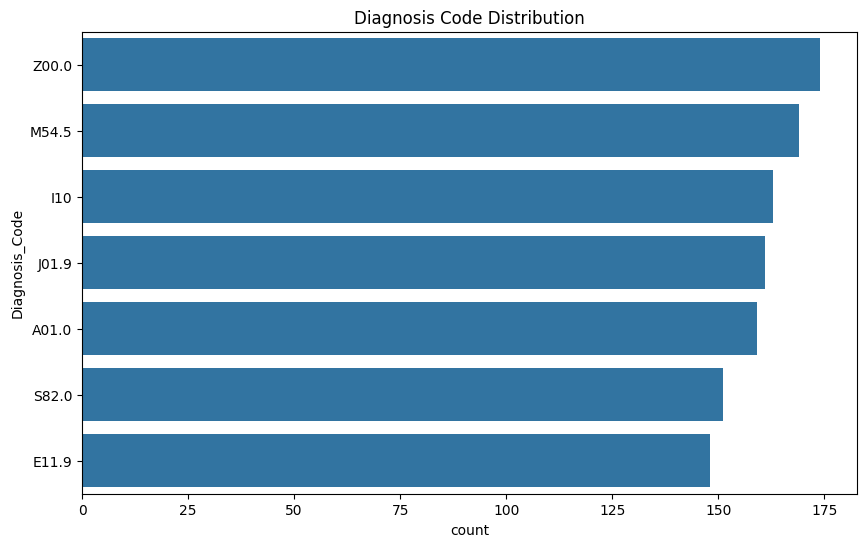

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(
    y="Diagnosis_Code",
    data=df,
    order=df["Diagnosis_Code"].value_counts().index
)
plt.title("Diagnosis Code Distribution")
plt.show()
